# 1. Installatie

In [39]:
!pip install stable-baselines3 matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


# 2. De enviroment inladen

In [40]:
import gym

env = gym.make('CartPole-v0')

# 3. model_dqn aanmaken en trainen

In [51]:
# Ik gebruik het "MlpPolicy" voor de neurale netwerkarchitectuur.
# Hierbij gebruik ik een multi-layer perceptron om de Q-functie te benaderen.
# Ik heb het verbose argument op 1 ingesteld, waardoor de voortgang van de training wordt weergegeven.  
# Ik heb de total_timesteps op 10000 ingesteld, dit is het totale aantal timesteps waarvoor het model wordt getraind.

from stable_baselines3 import DQN
model_dqn = DQN('MlpPolicy', env, verbose=1)
model_dqn.learn(total_timesteps=10000)


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.2     |
|    ep_rew_mean      | 26.2     |
|    exploration_rate | 0.9      |
| time/               |          |
|    episodes         | 4        |
|    fps              | 7148     |
|    time_elapsed     | 0        |
|    total_timesteps  | 105      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.4     |
|    ep_rew_mean      | 24.4     |
|    exploration_rate | 0.815    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 6914     |
|    time_elapsed     | 0        |
|    total_timesteps  | 195      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.7     |
|    ep_rew_mean      | 22.7  

# 4. model_ppo aanmaken en trainen

In [53]:
# Ik gebruik het "MlpPolicy" voor de neurale netwerkarchitectuur.
# Hierbij gebruik ik een multi-layer perceptron om de Q-functie te benaderen.
# Ik heb het verbose argument op 1 ingesteld, waardoor de voortgang van de training wordt weergegeven.  
# Ik heb de total_timesteps op 10000 ingesteld, dit is het totale aantal timesteps waarvoor het model wordt getraind.

from stable_baselines3 import PPO
model_ppo = PPO('MlpPolicy', env, verbose=1)
model_ppo.learn(total_timesteps=10000)


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.1     |
|    ep_rew_mean     | 22.1     |
| time/              |          |
|    fps             | 820      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27.1        |
|    ep_rew_mean          | 27.1        |
| time/                   |             |
|    fps                  | 590         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008307437 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss  

# 5. De modellen evalueren


In [54]:
# Hier definieer ik een functie evaluate die een model en het aantal uit te voeren episodes aanneemt, 
# en een array van rewards voor elke episode teruggeeft. 

import numpy as np

def evaluate(model, episodes=100):
    rewards = np.zeros(episodes)
    for i in range(episodes):
        obs = env.reset()
        done = False
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, info = env.step(action)
            rewards[i] += reward
    return rewards


# 6. Rewards vergelijken tussen model_dqn en model_ppo

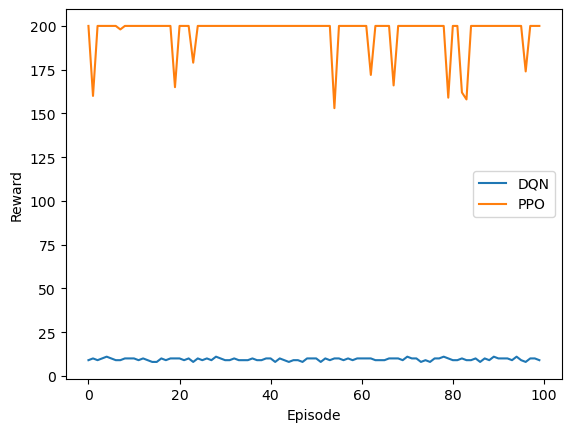

In [55]:
rewards_dqn = evaluate(model_dqn)
rewards_ppo = evaluate(model_ppo)

import matplotlib.pyplot as plt

plt.plot(rewards_dqn, label='DQN')
plt.plot(rewards_ppo, label='PPO')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()


# 7. De hyperparameters tunen

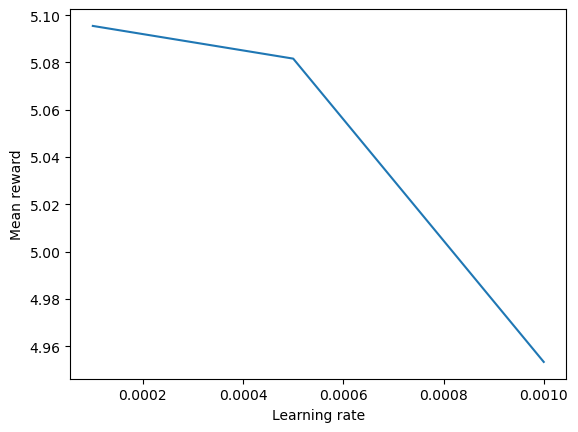

In [56]:
from stable_baselines3.common.evaluation import evaluate_policy

learning_rates = [1e-3, 5e-4, 1e-4]
mean_rewards = []

for lr in learning_rates:
    model = DQN('MlpPolicy', env, learning_rate=lr, verbose=0)
    model.learn(total_timesteps=10000)
    rewards = evaluate_policy(model, env, n_eval_episodes=100)
    mean_rewards.append(np.mean(rewards))

plt.plot(learning_rates, mean_rewards)
plt.xlabel('Learning rate')
plt.ylabel('Mean reward')
plt.show()
